## Import Important Libraries

In [7]:
import numpy as np

from qiskit.circuit.library import QFT
import qiskit.visualization as qv
from qiskit import IBMQ, Aer, QuantumCircuit, transpile, assemble
from qiskit.providers.ibmq import least_busy
from qiskit.quantum_info import Statevector
from qiskit.tools.monitor import job_monitor

import matplotlib.style
import matplotlib as plt
plt.style.use("dark_background")

#### Defining the Inverse QFT Circuit Function

In [8]:
def InvQFT(n):
    circuit = QuantumCircuit(n, name ="InQFT")
    circuit.qubits[::-n]
    for k in range(0, int(n/2)):
        circuit.swap(k, n-1-k) 
    circuit.barrier()
    for i in range(n):
        circuit.h(i)
        for j in range(i+1, n):
            circuit.cu(0, 0, -np.pi/(2**(j-i)),0 ,j, i)
        circuit.barrier() 
    return circuit

In [9]:
n = 4 # Controlled Qubits
m = 1 # Target Qubit

qpe = QuantumCircuit(n+m,n)
for i in range(n):
    qpe.h(i)
    
for j in range(m):
    qpe.x(j+n)

qpe.barrier()

x = 1
for i in range(n):
    for j in range(x):
        qpe.cu(0, 0, 2*np.pi/3, 0, i, n)
        x = x+1
    
qpe.barrier()
    
qpe.append(InvQFT(n), qpe.qubits[0:n])
    
qpe.barrier()
for i in range(n):
    qpe.measure(i,i)
qpe.draw()

┌───┐ ░                                                    »
q_0: ┤ H ├─░─────────■──────────────────────────────────────────»
     ├───┤ ░         │                                          »
q_1: ┤ H ├─░─────────┼────────────────■────────────────■────────»
     ├───┤ ░         │                │                │        »
q_2: ┤ H ├─░─────────┼────────────────┼────────────────┼────────»
     ├───┤ ░         │                │                │        »
q_3: ┤ H ├─░─────────┼────────────────┼────────────────┼────────»
     ├───┤ ░ ┌───────┴───────┐┌───────┴───────┐┌───────┴───────┐»
q_4: ┤ X ├─░─┤ U(0,0,2π/3,0) ├┤ U(0,0,2π/3,0) ├┤ U(0,0,2π/3,0) ├»
     └───┘ ░ └───────────────┘└───────────────┘└───────────────┘»
c: 4/═══════════════════════════════════════════════════════════»
                                                                »
«                                                                         »
«q_0: ────────────────────────────────────────────────────────────────────»
«                                                                         »
«q_1: ────────────────────────────────────────────────────────────────────»
«                                                                         »
«q_2: ────────■────────────────■────────────────■────────────────■────────»
«             │                │                │                │        »
«q_3: ────────┼────────────────┼────────────────┼────────────────┼────────»
«     ┌───────┴───────┐┌───────┴───────┐┌───────┴───────┐┌───────┴───────┐»
«q_4: ┤ U(0,0,2π/3,0) ├┤ U(0,0,2π/3,0) ├┤ U(0,0,2π/3,0) ├┤ U(0,0,2π/3,0) ├»
«     └───────────────┘└───────────────┘└───────────────┘└───────────────┘»
«c: 4/════════════════════════════════════════════════════════════════════»
«                                                                         »
«                                                                         »
«q_0: ────────────────────────────────────────────────────────────────────»
«                                                                         »
«q_1: ────────────────────────────────────────────────────────────────────»
«                                                                         »
«q_2: ────────────────────────────────────────────────────────────────────»
«                                                                         »
«q_3: ────────■────────────────■────────────────■────────────────■────────»
«     ┌───────┴───────┐┌───────┴───────┐┌───────┴───────┐┌───────┴───────┐»
«q_4: ┤ U(0,0,2π/3,0) ├┤ U(0,0,2π/3,0) ├┤ U(0,0,2π/3,0) ├┤ U(0,0,2π/3,0) ├»
«     └───────────────┘└───────────────┘└───────────────┘└───────────────┘»
«c: 4/════════════════════════════════════════════════════════════════════»
«                                                                         »
«                                                                          ░ »
«q_0: ─────────────────────────────────────────────────────────────────────░─»
«                                                                          ░ »
«q_1: ─────────────────────────────────────────────────────────────────────░─»
«                                                                          ░ »
«q_2: ─────────────────────────────────────────────────────────────────────░─»
«                                                                          ░ »
«q_3: ────────■────────────────■────────────────■────────────────■─────────░─»
«     ┌───────┴───────┐┌───────┴───────┐┌───────┴───────┐┌───────┴───────┐ ░ »
«q_4: ┤ U(0,0,2π/3,0) ├┤ U(0,0,2π/3,0) ├┤ U(0,0,2π/3,0) ├┤ U(0,0,2π/3,0) ├─░─»
«     └───────────────┘└───────────────┘└───────────────┘└───────────────┘ ░ »
«c: 4/═══════════════════════════════════════════════════════════════════════»
«                                                                            »
«     ┌────────┐ ░ ┌─┐         
«q_0: ┤0       ├─░─┤M├─────────
«     │        │ ░ └╥┘┌─┐      
«q_1: ┤1       ├─░──╫─┤M├──────
«     │  InQFT │

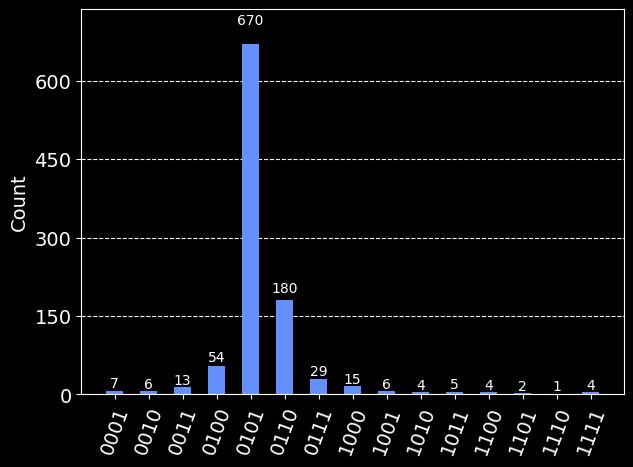

In [10]:
aer_sim = Aer.get_backend('aer_simulator')
shots = 1000
t_qpe = transpile(qpe, aer_sim)
results = aer_sim.run(t_qpe, shots=shots).result()
answer = results.get_counts()

qv.plot_histogram(answer)

In [ ]:
#We see we get one result (001) with certainty, which translates to the decimal: 1. We now need to divide our result by 2^n to get Theta:
# Theta = Binary(001)/2^n = 1/8 